In [1]:
import os
import random
import time
import glob
import json
import dit
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
os.chdir("../")
from helpers.compare_helpers import load_frame
from helpers.helpers import load_frame_sym, scatter3d
from helpers.group_helpers import append_srv,classify_syms, srv_to_mat

from jointpdfpython3.params_matrix import params2matrix_incremental,matrix2params_incremental
from jointpdfpython3.JointProbabilityMatrix import JointProbabilityMatrix
os.chdir("./plot_notebooks")

import seaborn as sns;sns.set()

In [2]:
# load symSRVs for number of states
folder = '../../results/syndisc_syms/'
states = 4
lenX = 2
dist_type = 'random'

subjects = np.arange(lenX)
with open('../../results/sudokus/'+'constructedSRVstates'+str(states)+'.npy', 'rb') as f:
    syms = np.load(f,allow_pickle=True)
lsyms, classes = classify_syms(syms,states)

os.chdir(folder)
name = dist_type+'states'+str(states)
allfiles = glob.glob(folder+"*.pkl")
files = [file for file in allfiles if name in file]
if len(files) != 0:
    print(files)
    d = pd.concat([pd.read_pickle(f) for f in files])
os.chdir('../../code/plot_notebooks')
d.keys()

['../../results/syndisc_syms\\comparisonrandomstates4-1.pkl', '../../results/syndisc_syms\\comparisonrandomstates4-2.pkl']


Index(['systemID', 'parX', 'pX', 'syn_upper', 'H(Xi)', 'I(X1;X2)', 'statesS',
       'lenS', 'tot_runtime', 'syn_info',
       ...
       'I(X;sym183)', 'I(Xi;sym183)', 'WMS(X;sym183)', 'H(Sfound|Sym)',
       'H(Sfound|bestof)', 'H(Sfound|Smin)', 'WMS(X;Smin)', 'I(Xi;Smin)',
       'normsyn', 'normWMS'],
      dtype='object', length=581)

In [5]:
os.getcwd()
d['normupper']=d['syn_upper']/2

## Plot syndisc given syms

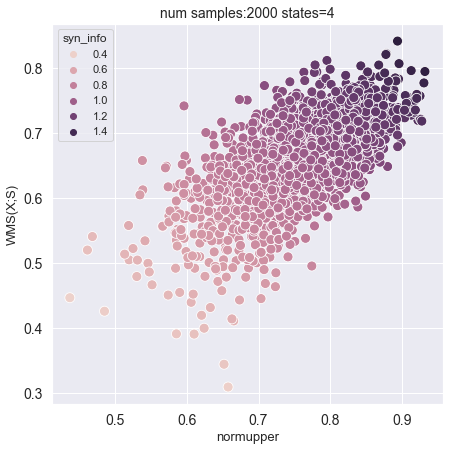

In [6]:
xcol = 'normupper'
ycol = 'WMS(X;S)'
hue_key = 'syn_info'

fig, ax = plt.subplots(figsize=(7,7))        
sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue=hue_key,
                sizes=(10,80),s=100,ax=ax)
title = "num samples:"+str(len(d))+' states='+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
plt.savefig('../../results/test/'+'states'+str(states)+'/'+name+'.png', bbox_inches='tight')    
plt.show()

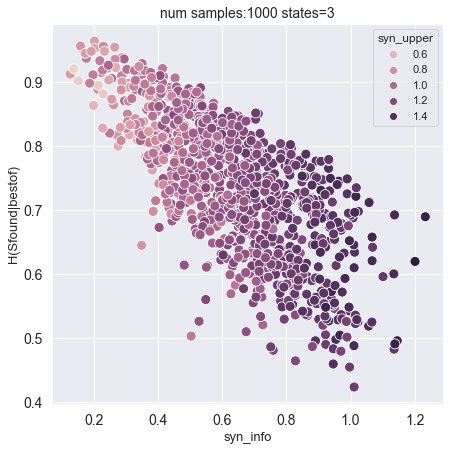

In [28]:
xcol = 'syn_info'
ycol = 'H(Sfound|bestof)'
hue_key = 'syn_upper'

fig, ax = plt.subplots(figsize=(7,7))        
sns.scatterplot(data=d, x=xcol, y=ycol, 
                hue=hue_key,
                sizes=(10,80),s=100,ax=ax)
title = "num samples:"+str(len(d))+' states='+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
# plt.savefig('../../results/test/'+'states'+str(states)+'/'+'twoDall_'+xcol+ycol+'hue_'+hue_key+'.png', bbox_inches='tight')    
plt.show()

## Get systems with low H(Sfound|bestof) v H(Sfound|min)

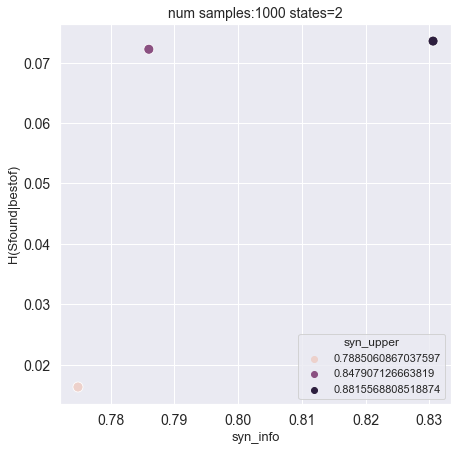

In [76]:
tol = 0.1

fig, ax = plt.subplots(figsize=(7,7))        
sns.scatterplot(data=d[d['H(Sfound|bestof)']<=tol], x=xcol, y=ycol, 
                hue=hue_key,
                sizes=(10,80),s=100,ax=ax)
title = "num samples:"+str(len(d))+' states='+str(states)
plt.title(title,fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xcol,fontsize=13)
plt.ylabel(ycol,fontsize=13)
# plt.savefig('../../results/test/'+'states'+str(states)+'/'+'twoDall_'+xcol+ycol+'hue_'+hue_key+'.png', bbox_inches='tight')    
plt.show()

In [88]:
def this_fails(y):
    x = 1/y
    print(x)
for i in [2,0,1,0,0,0,10,100]:
    try:
        this_fails(i)
    except ZeroDivisionError as err:
        continue
        print('Handling run-time error:', err)


0.5
1.0
0.1
0.01
